<a href="https://colab.research.google.com/github/YichengZou626/COMP590_intro_to_deep_learning/blob/main/Homework_2_(Yicheng_Zou).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Logistic Regression for Binary Classification (1.5 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

1.2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to 

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

1.3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by 

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

1.4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$. 

# 1.1

\begin{align}
        \frac{exp(o_1+c)}{\sum_{i=0}^n exp(o+c)} = \frac{exp(o_1)exp(c)}{\sum_{i=0}^n exp(o)exp(c)}
    \end{align}
we can simply divide exp(c) for numerator and denominator, and get the same equation as before.

# 1.2

\begin{align}
        p(y = 1|o) = \frac{exp(o_1)}{exp(o_{-1}) + exp(o_1)} = \frac{exp(o)}{1 + exp(o)} = \frac{1}{\frac{1}{exp(o)} + 1} = \frac{1}{exp(-o) + 1}
    \end{align}

# 1.3

\begin{align}
        p(y = -1|o) = \frac{exp(o_{-1})}{exp(o_{-1}) + exp(o_1)} = \frac{1}{1 + exp(o)}\\
        p(y|o) = \frac{1}{1+exp(-y*o)}\\
        -log(p(y|o) = -log(\frac{1}{1+exp(-y*o)}) = 0 - -(log(1+exp(-y*o)) = log(1+exp(-y*o)
    \end{align}

# 1.4

\begin{align}
        -log(y=1|o) = log(1+exp(-o)) = log(1+\frac{1}{exp(o)}) = log(\frac{exp(o)+1}{exp(o)})
    \end{align}

as o is reach to positive infinity, exp(o) will reach infinity, and log(1) = 0
as o is reach to negative infinity, exp(o) will reach to 0, and log(infinity) will be infinity.

# 2. Implementing the binary logistic loss (1 point)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in the autograd-enabled numerical computing library of your choice (TensorFlow, PyTorch, mxnet, JAX, etc.)
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Plot its derivative with respect to $o$ for $o \in [-5, 5]$ by using the automatic differentiation capabilities of the library you chose.

# 2.1

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf


def bll(y, o):
  return tf.math.log(1 + tf.exp(-y*o))



# 2.2

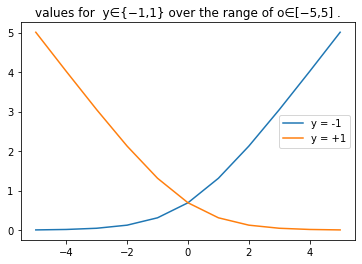

In [ ]:
o_neg = tf.range(-5,6, dtype=tf.float32)
o_pos = tf.range(-5,6, dtype=tf.float32)

neg_loss = bll(-1, o_neg)
pos_loss = bll(1, o_pos)

plt.figure()
plt.plot(o_neg.numpy(), neg_loss.numpy(),label = 'y = -1')
plt.plot(o_pos.numpy(), pos_loss.numpy(), label = 'y = +1')
plt.title("values for  y∈{−1,1} over the range of o∈[−5,5] .")
plt.legend()
plt.show()

# 2.3

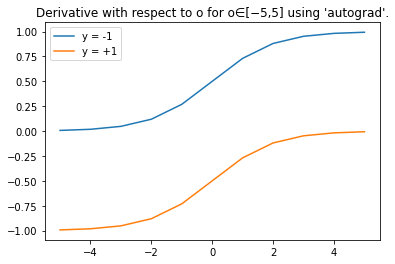

In [ ]:
o_neg = tf.range(-5,6, dtype=tf.float32)
o_pos = tf.range(-5,6, dtype=tf.float32)
o_neg = tf.Variable(o_neg)
o_pos = tf.Variable(o_pos)
with tf.GradientTape() as t:
    neg_loss = bll(-1, o_neg)
o_neg_grad = t.gradient(neg_loss, o_neg)

with tf.GradientTape() as t:
    pos_loss = bll(1, o_pos)
o_pos_grad = t.gradient(pos_loss, o_pos) 


plt.figure()
plt.plot(o_neg.numpy(), o_neg_grad.numpy(),label = 'y = -1')
plt.plot(o_pos.numpy(), o_pos_grad.numpy(), label = 'y = +1')
plt.title("Derivative with respect to o for o∈[−5,5] using 'autograd'.")
plt.legend()
plt.show()

# 3. T-shirt vs. Trouser classification (1.5 points)

1. Implement a logistic regression model on the Fashion MNIST datasets that classifies between t-shirts and trousers, rather than all 10 of the classes. Feel free to use the softmax regression code from the textbook (sections 3.5-3.7), but use the binary logistic loss you defined above (which assumes that the labels are -1 or 1) rather than a softmax cross-entropy loss. This will require creating custom version of the `d2l.load_data_fashion_mnist` that removes any examples that are not t-shirts or trousers, and maps the labels to -1 and 1.
2. After implementing this model and getting it to work, try changing the learning rate and weight initialization scale. Can you get the model to train more quickly? What values of these hyperparameters result in bad models/poor training dynamics?

*Note*: Make sure the runtime type is "GPU" to speed things up!

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

train_filter = np.where((Y_train == 0 ) | (Y_train == 1))
test_filter = np.where((Y_test == 0) | (Y_test == 1))


x_train, y_train = X_train[train_filter], Y_train[train_filter]
x_test, y_test = X_test[test_filter], Y_test[test_filter]


In [ ]:
y_train = -1 + 2*y_train
y_test = -1 + 2*y_test

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):
    """Download the Fashion-MNIST dataset and then load it into memory."""
    mnist_train, mnist_test = (x_train, y_train), (x_test, y_test)
    # Divide all numbers by 255 so that all pixel values are between
    # 0 and 1, add a batch dimension at the last. And cast label to int32
    process = lambda X, y: (tf.expand_dims(X, axis=3) / 255,
                            tf.cast(y, dtype='float32'))
    resize_fn = lambda X, y: (
        tf.image.resize_with_pad(X, resize, resize) if resize else X, y)
    return (
        tf.data.Dataset.from_tensor_slices(process(*mnist_train)).batch(
            batch_size).shuffle(len(mnist_train[0])).map(resize_fn),
        tf.data.Dataset.from_tensor_slices(process(*mnist_test)).batch(
            batch_size).map(resize_fn))

In [ ]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs = 784
num_outputs = 2

w = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs),
                                 mean=0, stddev=0.01))
b = tf.Variable(tf.zeros(num_outputs))

In [ ]:
def softmax(O):
    O_exp = tf.exp(O)
    partition = tf.reduce_sum(O_exp, 1, keepdims=True)
    return O_exp / partition

In [ ]:
def vbll(y, O):
    return tf.math.log(1+tf.exp(-y*O[:,1]))

In [ ]:
def net(X):
    return tf.matmul(tf.reshape(X, (-1, w.shape[0])), w) + b

In [ ]:
def sgd(params, grads, lr, batch_size): 
    """Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [ ]:
lr = 0.01
num_epochs = 50
w = tf.Variable(w)
b = tf.Variable(b)
loss_list = []

for epoch in range(num_epochs):
    for X, y in train_iter: 
      with tf.GradientTape() as g:
        l = vbll(y, net(X))
      dw, db = g.gradient(l, [w, b])
      sgd([w, b], [dw, db], lr, batch_size)
    train_l = vbll(y, net(X))
    loss_list.append(tf.reduce_mean(train_l).numpy())
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.273009
epoch 2, loss 0.211607
epoch 3, loss 0.172477
epoch 4, loss 0.156981
epoch 5, loss 0.141471
epoch 6, loss 0.153150
epoch 7, loss 0.112434
epoch 8, loss 0.119778
epoch 9, loss 0.121928
epoch 10, loss 0.094999
epoch 11, loss 0.118183
epoch 12, loss 0.116014
epoch 13, loss 0.126769
epoch 14, loss 0.084935
epoch 15, loss 0.091775
epoch 16, loss 0.112222
epoch 17, loss 0.121452
epoch 18, loss 0.116206
epoch 19, loss 0.065991
epoch 20, loss 0.081827
epoch 21, loss 0.102945
epoch 22, loss 0.076313
epoch 23, loss 0.078296
epoch 24, loss 0.077222
epoch 25, loss 0.104283
epoch 26, loss 0.087390
epoch 27, loss 0.073681
epoch 28, loss 0.073362
epoch 29, loss 0.060765
epoch 30, loss 0.077972
epoch 31, loss 0.065414
epoch 32, loss 0.068953
epoch 33, loss 0.057485
epoch 34, loss 0.083797
epoch 35, loss 0.056631
epoch 36, loss 0.102682
epoch 37, loss 0.060395
epoch 38, loss 0.096910
epoch 39, loss 0.053532
epoch 40, loss 0.054386
epoch 41, loss 0.059417
epoch 42, loss 0.054604
e

Text(0, 0.5, 'Loss')

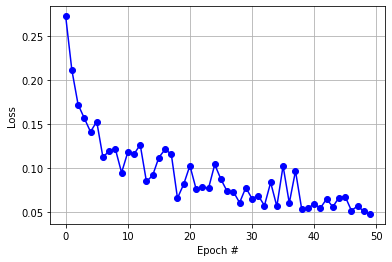

In [ ]:
plt.figure(1)
plt.plot(np.arange(num_epochs), loss_list, 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")

In [ ]:
count = 0
for X, y in test_iter:
  y_hat = softmax(net(X))
  y_hat = tf.argmax(y_hat, axis=1)
  y_hat = -1 + 2*y_hat
  cmp = tf.cast(y_hat, y.dtype) == y
  count += float(tf.reduce_sum(tf.cast(cmp, y.dtype)))
count/len(y_test)

0.977

# 3.2

In [ ]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs = 784
num_outputs = 2

w = tf.Variable(tf.random.normal(shape=(num_inputs, num_outputs),
                                 mean=0, stddev=1))
b = tf.Variable(tf.zeros(num_outputs))

In [ ]:
lr = 0.1
num_epochs = 50
w = tf.Variable(w)
b = tf.Variable(b)
loss_list = []

for epoch in range(num_epochs):
    for X, y in train_iter: 
      with tf.GradientTape() as g:
        l = vbll(y, net(X))
      dw, db = g.gradient(l, [w, b])
      sgd([w, b], [dw, db], lr, batch_size)
    train_l = vbll(y, net(X))
    loss_list.append(tf.reduce_mean(train_l).numpy())
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.306434
epoch 2, loss 0.330433
epoch 3, loss 0.266792
epoch 4, loss 0.297209
epoch 5, loss 0.169003
epoch 6, loss 0.234266
epoch 7, loss 0.135263
epoch 8, loss 0.185622
epoch 9, loss 0.158106
epoch 10, loss 0.160614
epoch 11, loss 0.219540
epoch 12, loss 0.089981
epoch 13, loss 0.084956
epoch 14, loss 0.040197
epoch 15, loss 0.057087
epoch 16, loss 0.114881
epoch 17, loss 0.058844
epoch 18, loss 0.034816
epoch 19, loss 0.088276
epoch 20, loss 0.220009
epoch 21, loss 0.110332
epoch 22, loss 0.127650
epoch 23, loss 0.062731
epoch 24, loss 0.085162
epoch 25, loss 0.030961
epoch 26, loss 0.093400
epoch 27, loss 0.107037
epoch 28, loss 0.057217
epoch 29, loss 0.103271
epoch 30, loss 0.059141
epoch 31, loss 0.105823
epoch 32, loss 0.057472
epoch 33, loss 0.019890
epoch 34, loss 0.119671
epoch 35, loss 0.047990
epoch 36, loss 0.136244
epoch 37, loss 0.102437
epoch 38, loss 0.113188
epoch 39, loss 0.081172
epoch 40, loss 0.101713
epoch 41, loss 0.056373
epoch 42, loss 0.085730
e

Text(0, 0.5, 'Loss')

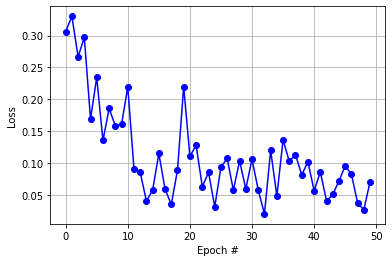

In [ ]:
plt.figure(2)
plt.plot(np.arange(num_epochs), loss_list, 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")

In [ ]:
count = 0
for X, y in test_iter:
  y_hat = softmax(net(X))
  y_hat = tf.argmax(y_hat, axis=1)
  y_hat = -1 + 2*y_hat
  cmp = tf.cast(y_hat, y.dtype) == y
  count += float(tf.reduce_sum(tf.cast(cmp, y.dtype)))
count/len(y_test)

0.9145

If I increase the learning rate from 0.01 to 0.1, and make the standard deviation of random initilization of weight w to 1, I get the bad model, and the overall accuracy is decreased.